# Importing the Libraries

In [1]:
import numpy as np # mathematical operations
import pandas as pd # processing of the data
import matplotlib.pyplot as plt # visualization of data that uses numpy and pandas

# Loading the Dataset

In [2]:
# Loading the Dataset
df = pd.read_csv("ws_data.csv")
# Verifying the Dataset
df.head()

,id,date,time_recorded,source_ip,operator,test_metadata,uploaded_file
0,1,21-10-2022,13:16,d87d:b91:be52:8ad4:bf57:a5f9:73c0:96cf,user4,NaN,Oz2z9.tsv
1,2,03-10-2022,7:39,186d:fecc:dc02:d7d0:c609:e6c:1d67:63e4,user1,"[{},{},{}]",S5tRB.tsv
2,3,18-11-2022,5:35,5ef1:e7b1:710e:d737:d418:4c78:8ba2:9b22,user1,"[{},{},{},{},{}]",2T6j8.xlsx
3,4,NaN,NaN,2e4d:a235:f05c:f4ae:9d27:cd1d:127:84d,user5,"[{},{},{},{},{}]",agUx7.xls
4,5,02-06-2023,1:57,3642:7a16:ebd:8d06:ba8:4f5e:d24c:3259,user3,"[{},{},{}]",aA0Lf.xls


# Printing the columns of the Dataset

In [3]:
# Task 1: 
df.columns # Printing Column Headings

Index(['id', 'date', 'time_recorded', 'source_ip', 'operator', 'test_metadata',
       'uploaded_file'],
      dtype='object')

# Adding a new column

In [4]:
#Task 2
df['new_col'] = df['source_ip'] + '-' + df['operator'] + '/' + df['uploaded_file'] 
df

,id,date,time_recorded,source_ip,operator,test_metadata,uploaded_file,new_col
0,1,21-10-2022,13:16,d87d:b91:be52:8ad4:bf57:a5f9:73c0:96cf,user4,NaN,Oz2z9.tsv,d87d:b91:be52:8ad4:bf57:a5f9:73c0:96cf-user4/O...
1,2,03-10-2022,7:39,186d:fecc:dc02:d7d0:c609:e6c:1d67:63e4,user1,"[{},{},{}]",S5tRB.tsv,186d:fecc:dc02:d7d0:c609:e6c:1d67:63e4-user1/S...
2,3,18-11-2022,5:35,5ef1:e7b1:710e:d737:d418:4c78:8ba2:9b22,user1,"[{},{},{},{},{}]",2T6j8.xlsx,5ef1:e7b1:710e:d737:d418:4c78:8ba2:9b22-user1/...
3,4,NaN,NaN,2e4d:a235:f05c:f4ae:9d27:cd1d:127:84d,user5,"[{},{},{},{},{}]",agUx7.xls,2e4d:a235:f05c:f4ae:9d27:cd1d:127:84d-user5/ag...
4,5,02-06-2023,1:57,3642:7a16:ebd:8d06:ba8:4f5e:d24c:3259,user3,"[{},{},{}]",aA0Lf.xls,3642:7a16:ebd:8d06:ba8:4f5e:d24c:3259-user3/aA...
...,...,...,...,...,...,...,...,...
995,996,11-09-2022,22:28,8f31:61ec:d1cc:210a:e5ed:995a:7aae:8b5b,user4,"[{},{},{}]",7w4UK.xls,8f31:61ec:d1cc:210a:e5ed:995a:7aae:8b5b-user4/...
996,997,21-01-2023,22:15,bdb6:843a:9f08:2e81:8a5c:e3c8:20d9:c980,user3,"[{},{},{},{},{}]",cU7kJ.tsv,bdb6:843a:9f08:2e81:8a5c:e3c8:20d9:c980-user3/...
997,998,22-12-2022,0:38,3b2a:ab9b:4178:6409:49e9:7824:4d6a:a68a,user3,"[{},{},{},{},{}]",gv40f.tsv,3b2a:ab9b:4178:6409:49e9:7824:4d6a:a68a-user3/...
998,999,02-04-2023,0:27,1a22:bed0:4ee6:189d:9335:690a:eed:b850,user3,"[{},{},{}]",7682u.csv,1a22:bed0:4ee6:189d:9335:690a:eed:b850-user3/7...


# Plotting Rate of Uploads over Time

In [12]:
#Task 3
# Converting the Date column to Datetime Format
df['date'] = pd.to_datetime(df['date'])
# Creating a new column
df['month_year'] = df['date'].dt.to_period('M')
# Calculating the monthly_counts with respect to its index
months = df['month_year'].value_counts().sort_index()
months = months.reset_index()
months.columns = ['Month-Year', 'Count']
months = months.sort_values(by='Month-Year')

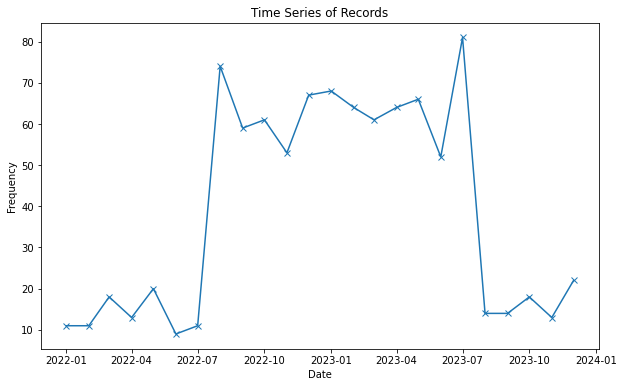

In [13]:
# Converting the month column to Datetime object
months['Month-Year'] = months['Month-Year'].dt.to_timestamp()
months = months.sort_values(by='Month-Year')
# Plotting a line Graph
plt.figure(figsize=(10, 6))
plt.plot(months['Month-Year'], months['Count'], marker = 'x', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Time Series of Records')

plt.show()

# Plotting a histogram

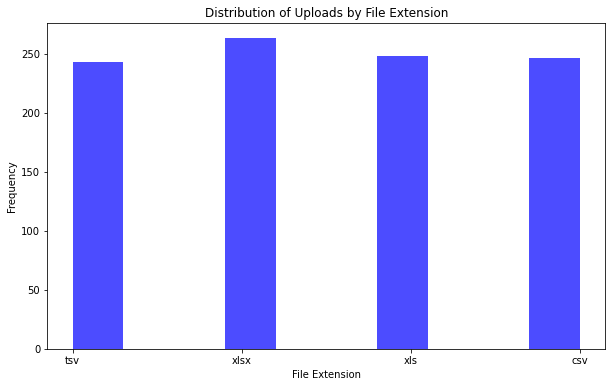

In [7]:
#Task 4
# Splitting the file with . str
df['file_extension'] = df['uploaded_file'].str.split('.').str[-1]

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['file_extension'], bins=10, color='blue', alpha=0.7)
plt.xlabel('File Extension')
plt.ylabel('Frequency')
plt.title('Distribution of Uploads by File Extension')
plt.show()

# Giving names to the Users

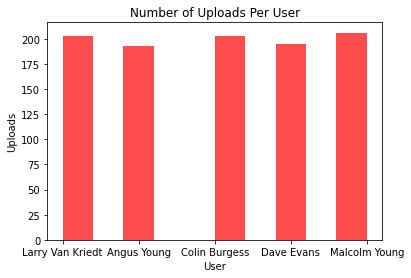

In [8]:
#Task 5
# Creating a dictionary and giving the values to the keys and mapping it
user_name = {
    "user1": "Angus Young",
    "user4": "Larry Van Kriedt",
    "user2": "Malcolm Young",
    "user3": "Dave Evans",
    "user5": "Colin Burgess",

}

df['operator_real_name'] = df['operator'].map(user_name)

#Plotting a histogram
plt.hist(df['operator_real_name'], bins=10, color='red', alpha=0.7)
plt.xlabel('User')
plt.ylabel('Uploads')
plt.title('Number of Uploads Per User')
plt.show()

# Converting the Datetime Format

In [9]:
input = '10 April 2000'
print("Input: ", input)
 
x = pd.to_datetime(input)
print("Datetime format: ", x)
 
y = x.strftime("%m-%Y")
print("Preferred format: ", y)

Input:  10 April 2000
Datetime format:  2000-04-10 00:00:00
Preferred format:  04-2000


In [11]:
# Checking the day from the date column
df.loc[2, "date"].day_name()


'Friday'